In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats
import statsmodels.api as sm
import os

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

%matplotlib inline
warnings.filterwarnings('ignore')

In [6]:
stock = pd.read_csv('./dataset/cryptocurrencies/HEX-USD.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-22,0.004035,0.004105,0.003688,0.003790,0.003790,1486491.0
1,2020-09-23,0.003789,0.003798,0.003345,0.003443,0.003443,1522601.0
2,2020-09-24,0.003443,0.003630,0.003429,0.003618,0.003618,1316401.0
3,2020-09-25,0.003622,0.003774,0.003568,0.003753,0.003753,1174258.0
4,2020-09-26,0.003754,0.004019,0.003542,0.004019,0.004019,1181630.0


Checking null values

In [7]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       357 non-null    object 
 1   Open       196 non-null    float64
 2   High       196 non-null    float64
 3   Low        196 non-null    float64
 4   Close      196 non-null    float64
 5   Adj Close  196 non-null    float64
 6   Volume     196 non-null    float64
dtypes: float64(6), object(1)
memory usage: 19.6+ KB


In [8]:
stock.dropna(axis=0, inplace=True)
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 356
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       196 non-null    object 
 1   Open       196 non-null    float64
 2   High       196 non-null    float64
 3   Low        196 non-null    float64
 4   Close      196 non-null    float64
 5   Adj Close  196 non-null    float64
 6   Volume     196 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.2+ KB


Non-Parametric Estimation
===================================
Plot PDF in histogram and using KDE for each variables

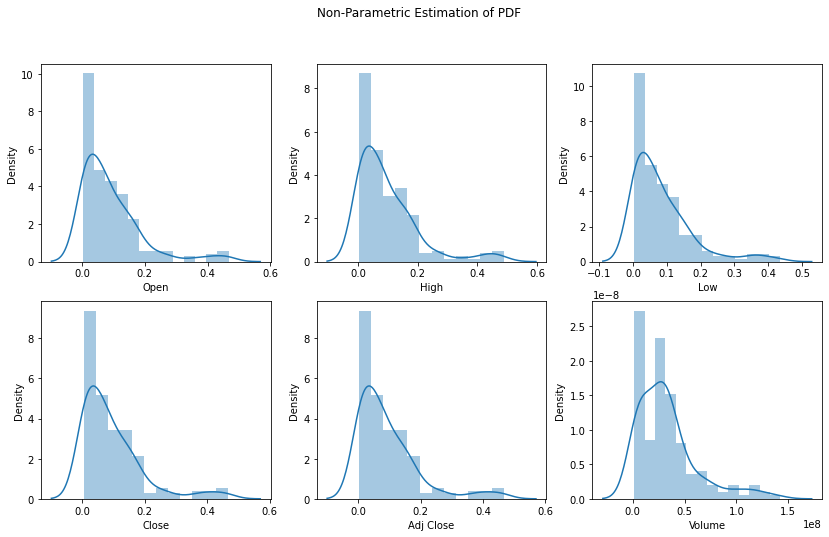

In [9]:
# initiate figure
fig, ax = plt.subplots(2, 3, figsize=(14,8))
fig.suptitle('Non-Parametric Estimation of PDF')

# columns to plot
columns = list(stock.columns[1:])

for ax, cols in zip(ax.flat, columns):
    sns.distplot(stock[cols], ax=ax, kde=True)

Multivariate Mathematical Expectation & Variance
================================================
Take mean and variance from all continuous variables

In [10]:
stock[columns].mean()

Open         9.091348e-02
High         9.758681e-02
Low          8.410839e-02
Close        9.276402e-02
Adj Close    9.276402e-02
Volume       3.240606e+07
dtype: float64

In [11]:
stock[columns].cov()

,Open,High,Low,Close,Adj Close,Volume
Open,9.386864e-03,9.920453e-03,8.556312e-03,9.520111e-03,9.520111e-03,2.338488e+06
High,9.920453e-03,1.056896e-02,9.073779e-03,1.014133e-02,1.014133e-02,2.564588e+06
Low,8.556312e-03,9.073779e-03,7.858989e-03,8.729385e-03,8.729385e-03,2.131807e+06
Close,9.520111e-03,1.014133e-02,8.729385e-03,9.762214e-03,9.762214e-03,2.440027e+06
Adj Close,9.520111e-03,1.014133e-02,8.729385e-03,9.762214e-03,9.762214e-03,2.440027e+06
Volume,2.338488e+06,2.564588e+06,2.131807e+06,2.440027e+06,2.440027e+06,8.317861e+14


Conditional Distribution Non-Parametric Estimation, Mathematical Expectation, & Variance
===


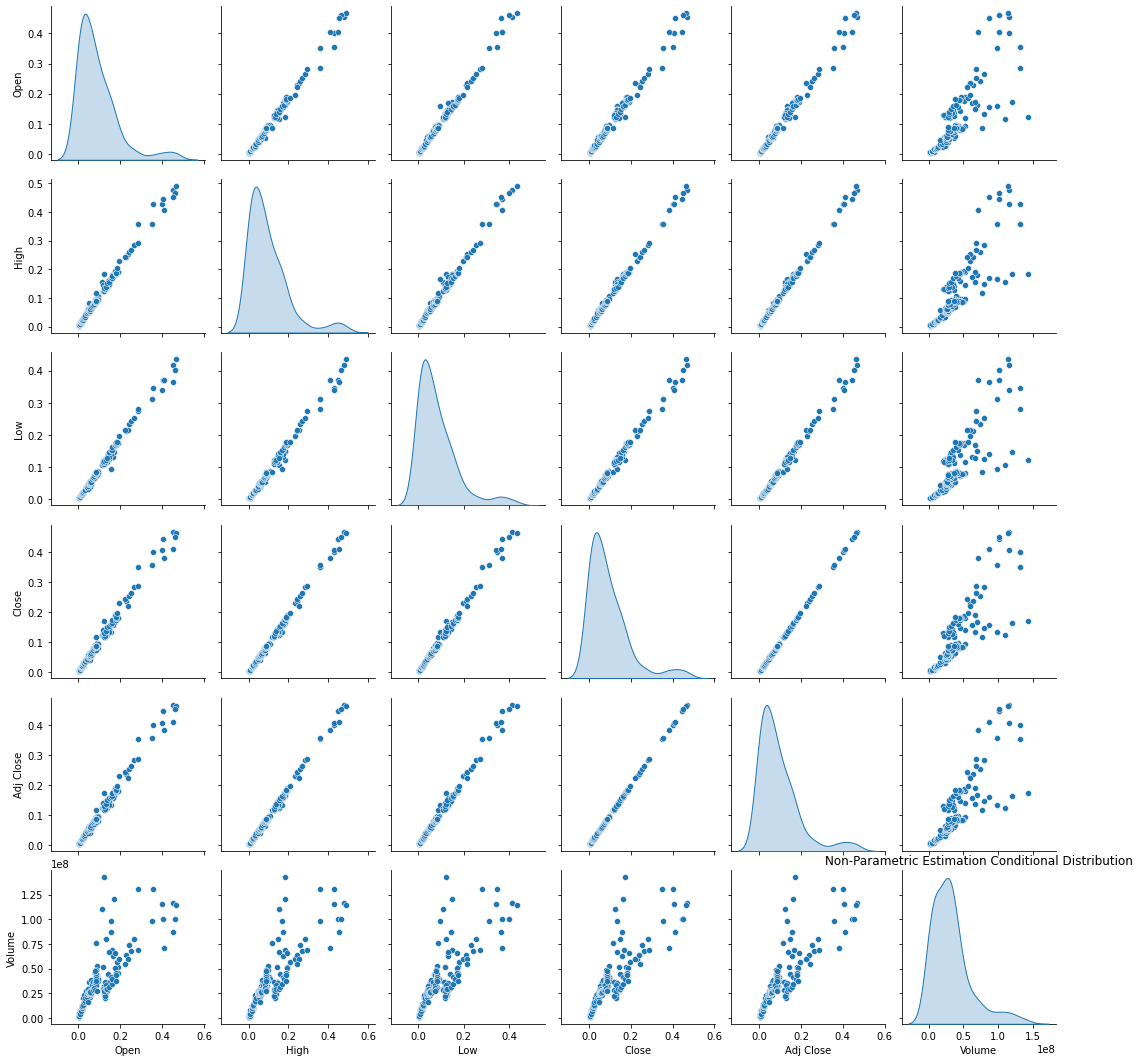

In [12]:
sns.pairplot(stock[columns], diag_kind='kde')
plt.title('Non-Parametric Estimation Conditional Distribution')
plt.show()

Generate discrete variable

In [13]:
# convert Date column into datetime
stock.Date = pd.to_datetime(stock.Date)
stock.sort_values(by=['Date'], inplace=True)

# extract month & year from Date column
stock['Month'] = stock.Date.dt.month
stock['Year'] = stock.Date.dt.year

stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2020-09-22,0.004035,0.004105,0.003688,0.003790,0.003790,1486491.0,9,2020
1,2020-09-23,0.003789,0.003798,0.003345,0.003443,0.003443,1522601.0,9,2020
2,2020-09-24,0.003443,0.003630,0.003429,0.003618,0.003618,1316401.0,9,2020
3,2020-09-25,0.003622,0.003774,0.003568,0.003753,0.003753,1174258.0,9,2020
4,2020-09-26,0.003754,0.004019,0.003542,0.004019,0.004019,1181630.0,9,2020


In [14]:
conditional = stock.Year == 2021
stock[conditional].mean(), stock[conditional].var()

(Open         1.065125e-01
 High         1.143271e-01
 Low          9.851484e-02
 Close        1.086726e-01
 Adj Close    1.086726e-01
 Volume       3.784840e+07
 Month        6.246988e+00
 Year         2.021000e+03
 dtype: float64,
 Open         9.493894e-03
 High         1.064817e-02
 Low          7.923471e-03
 Close        9.873308e-03
 Adj Close    9.873308e-03
 Volume       7.879492e+14
 Month        2.502264e+00
 Year         0.000000e+00
 dtype: float64)

Mathematical Expectation of Conditional Distribution

In [15]:
pd.pivot_table(stock[stock.Year == 2021], values=columns, index=['Month', 'Year'], aggfunc=np.mean)

,,Adj Close,Close,High,Low,Open,Volume
Month,Year,,,,,,
4,2021,0.018023,0.018023,0.019130,0.016609,0.018031,9.790352e+06
5,2021,0.044762,0.044762,0.049300,0.039202,0.043640,2.345029e+07
6,2021,0.075615,0.075615,0.079327,0.068909,0.074552,3.411976e+07
7,2021,0.117988,0.117988,0.126320,0.106203,0.116751,5.317630e+07
8,2021,0.168495,0.168495,0.175366,0.157147,0.164246,4.218318e+07
9,2021,0.381686,0.381686,0.395691,0.339141,0.372294,9.864835e+07


Variance of Conditional Distribution

In [16]:
pd.pivot_table(stock[stock.Year == 2021], values=columns, index=['Month', 'Year'], aggfunc=np.var)

,,Adj Close,Close,High,Low,Open,Volume
Month,Year,,,,,,
4,2021,0.000003,0.000003,0.000004,0.000004,0.000003,2.545319e+12
5,2021,0.000171,0.000171,0.000243,0.000138,0.000192,4.203772e+13
6,2021,0.000176,0.000176,0.000221,0.000134,0.000190,5.730856e+13
7,2021,0.000927,0.000927,0.001255,0.000649,0.000964,9.543966e+14
8,2021,0.001468,0.001468,0.001527,0.001174,0.001280,1.984711e+14
9,2021,0.004865,0.004865,0.005908,0.003901,0.006238,5.037914e+14


Pair Correlation Coefficient
===

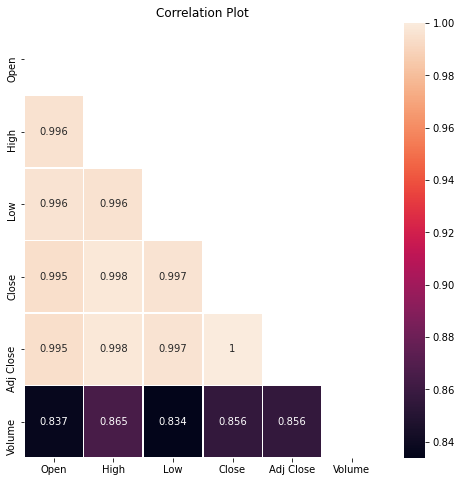

In [17]:
fig, ax = plt.subplots(figsize=(8,8))

corr = stock[columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, ax=ax, vmax=1, fmt='.3g', linewidths=.5)

plt.title('Correlation Plot')
plt.show()

As we can see the variables has high correlation each other.

In [18]:
from scipy import stats

for i, col in enumerate(columns):
    j = i+1

    # stop looping if j reach end of index
    if j >= len(columns):
        break

    for k in range(j, len(columns)):

        col2 = columns[k]

        x1, x2 = stock[col], stock[col2]
        coeff, p = stats.pearsonr(x1, x2)
        coeff_z = np.arctanh(coeff)

        std = 1/np.sqrt(x1.size-3)
        alpha = 0.05
        z = stats.norm.ppf(1-alpha/2)
        low_z, high_z = coeff_z-z*std, coeff_z+z*std
        
        print('%s - %s' % (col, col2))
        print('Correlation coeff = ', coeff)
        print('Confidence interval = ', low_z, high_z)
        print('-----')

Open - High
Correlation coeff =  0.9959902553078679
Confidence interval =  2.964002706930333 3.246165296324753
-----
Open - Low
Correlation coeff =  0.9961918938171255
Confidence interval =  2.9898510006721306 3.2720135900665506
-----
Open - Close
Correlation coeff =  0.9945064697942587
Confidence interval =  2.806209126084298 3.088371715478718
-----
Open - Adj Close
Correlation coeff =  0.9945064697942587
Confidence interval =  2.806209126084298 3.088371715478718
-----
Open - Volume
Correlation coeff =  0.8368911794776235
Confidence interval =  1.06962483363657 1.3517874230309903
-----
High - Low
Correlation coeff =  0.9956087621002582
Confidence interval =  2.918465334118425 3.2006279235128448
-----
High - Close
Correlation coeff =  0.9984001670002398
Confidence interval =  3.424020192447738 3.7061827818421578
-----
High - Adj Close
Correlation coeff =  0.9984001670002398
Confidence interval =  3.424020192447738 3.7061827818421578
-----
High - Volume
Correlation coeff =  0.8649591665

Regression Data Prep
===

In [19]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2020-09-22,0.004035,0.004105,0.003688,0.003790,0.003790,1486491.0,9,2020
1,2020-09-23,0.003789,0.003798,0.003345,0.003443,0.003443,1522601.0,9,2020
2,2020-09-24,0.003443,0.003630,0.003429,0.003618,0.003618,1316401.0,9,2020
3,2020-09-25,0.003622,0.003774,0.003568,0.003753,0.003753,1174258.0,9,2020
4,2020-09-26,0.003754,0.004019,0.003542,0.004019,0.004019,1181630.0,9,2020


In [144]:
# predictors
X = stock[['Open', 'High', 'Low', 'Adj Close']]

# target
y = stock[['Close']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)
params = np.append(lr.intercept_, lr.coef_)

print(f'Params: {params}')

Params: [ 4.16333634e-17 -5.10862848e-16 -8.32737921e-17 -3.88727694e-16
  1.00000000e+00]


In [145]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [146]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mape(y_test, y_pred)

print(f'MAE = {mae}')
print(f'MSE = {mse}')
print(f'MAPE = {mape}')

MAE = 3.166954545830159e-17
MSE = 1.7051862112350203e-33
MAPE = Close    1.812226e-13
dtype: float64


Due to multicollinearity, here we applied regularization models Lasso and Ridge.

In [147]:
def score_model(alphas, X_train, X_test, y_train, y_test, model_name='Lasso'):

    train_mae = []
    train_mse = []
    train_rmse = []
    train_mape = []
    
    test_mae = []
    test_mse = []
    test_rmse = []
    test_mape = []

    coefs = []

    for alpha in alphas:
                
        if model_name == 'Lasso':
            model = Lasso(alpha=alpha)
        elif model_name == 'Ridge':
            model = Ridge(alpha=alpha)
        else:
            print('Please specify valid model.')
            return None

        # train model
        model.fit(X_train, y_train)
        coefs.append(model.coef_)

        # predict on training data
        train_pred = model.predict(X_train)

        # compute error
        train_mae.append(mean_absolute_error(train_pred, y_train))
        train_mse.append(mean_squared_error(train_pred, y_train))
        train_rmse.append(mean_squared_error(train_pred, y_train, squared=False))
        train_mape.append(mean_absolute_percentage_error(train_pred, y_train))

        # predict on test data
        test_pred = model.predict(X_test)

        # compute error
        test_mae.append(mean_absolute_error(test_pred, y_test))
        test_mse.append(mean_squared_error(test_pred, y_test))
        test_rmse.append(mean_squared_error(test_pred, y_test, squared=False))
        test_mape.append(mean_absolute_percentage_error(test_pred, y_test))
    
    # init plot figure
    fig, ax = plt.subplots(4, 1, figsize=(15,10), sharex=True)
    fig.suptitle(f'{model_name} Error Plot', fontweight='bold', fontsize=15)
    
    ax[0].plot(alphas, train_mae, label='train')
    ax[0].plot(alphas, test_mae, label='test')
    ax[0].set_title('MAE')
    ax[0].legend()

    ax[1].plot(alphas, train_mse, label='train')
    ax[1].plot(alphas, test_mse, label='test')
    ax[1].set_title('MSE')
    ax[1].legend()

    ax[2].plot(alphas, train_rmse, label='train')
    ax[2].plot(alphas, test_rmse, label='test')
    ax[2].set_title('RMSE')
    ax[2].legend()

    ax[3].plot(alphas, train_mape, label='train')
    ax[3].plot(alphas, test_mape, label='test')
    ax[3].set_title('MAPE')
    ax[3].legend()

    # plt.tight_layout()
    plt.show()

    best_mae = {
        'alpha': alphas[np.argmin(test_mae)],
        'mae': np.min(test_mae),
        'coef': coefs[np.argmin(test_mae)]
    }

    best_mse = {
        'alpha': alphas[np.argmin(test_mse)],
        'mse': np.min(test_mse),
        'coef': coefs[np.argmin(test_mse)]
    }

    best_rmse = {
        'alpha': alphas[np.argmin(test_rmse)],
        'rmse': np.min(test_rmse),
        'coef': coefs[np.argmin(test_rmse)]
    }

    best_mape = {
        'alpha': alphas[np.argmin(test_mape)],
        'mape': np.min(test_mape),
        'coef': coefs[np.argmin(test_mape)]
    }

    return best_mae, best_mse, best_rmse, best_mape

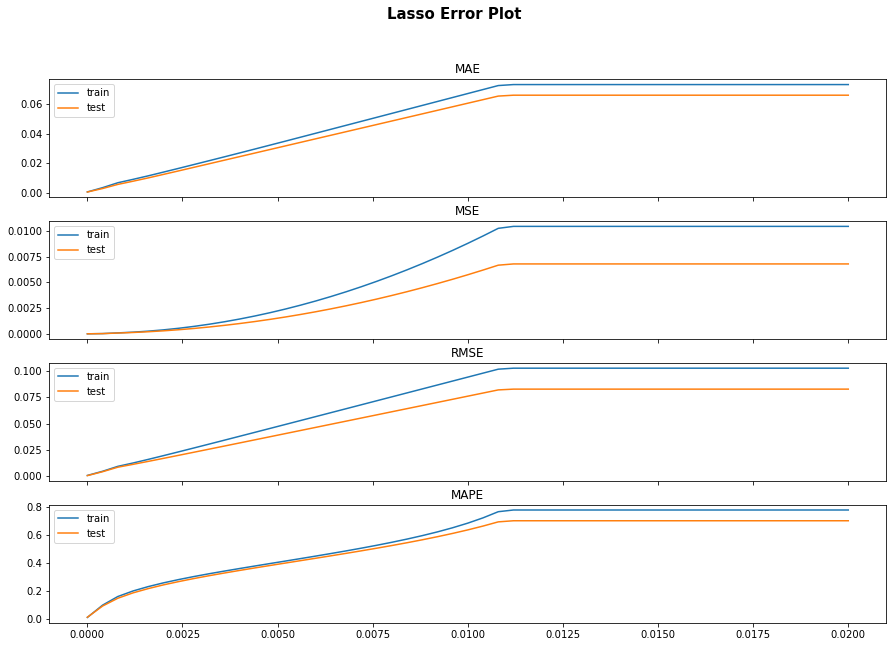

({'alpha': 0.0,
  'mae': 0.0005001143827876843,
  'coef': array([-0.11195679,  0.10865212,  0.13953329,  0.87154238])},
 {'alpha': 0.0,
  'mse': 5.567736544087351e-07,
  'coef': array([-0.11195679,  0.10865212,  0.13953329,  0.87154238])},
 {'alpha': 0.0,
  'rmse': 0.0007461726706391324,
  'coef': array([-0.11195679,  0.10865212,  0.13953329,  0.87154238])},
 {'alpha': 0.0,
  'mape': 0.01580761058527102,
  'coef': array([-0.11195679,  0.10865212,  0.13953329,  0.87154238])})

In [148]:
alphas = numpy.linspace(0,0.02,51)
score_model(alphas, X_train, X_test, y_train, y_test)

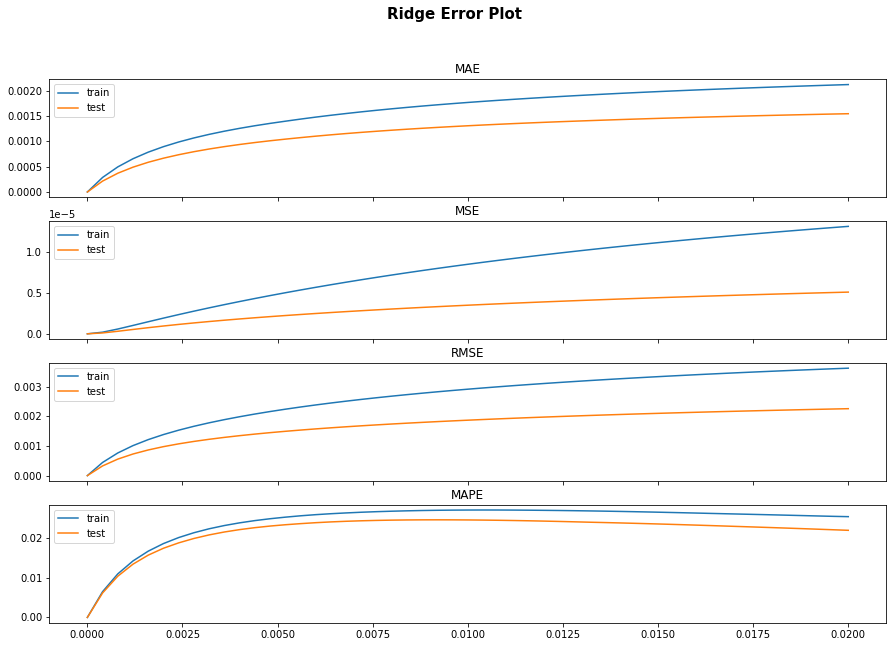

({'alpha': 0.0,
  'mae': 4.3698768562028256e-16,
  'coef': array([[ 8.37653709e-14, -5.38989693e-14, -1.31732020e-13,
           1.00000000e+00]])},
 {'alpha': 0.0,
  'mse': 4.284660404806553e-31,
  'coef': array([[ 8.37653709e-14, -5.38989693e-14, -1.31732020e-13,
           1.00000000e+00]])},
 {'alpha': 0.0,
  'rmse': 6.545731742751572e-16,
  'coef': array([[ 8.37653709e-14, -5.38989693e-14, -1.31732020e-13,
           1.00000000e+00]])},
 {'alpha': 0.0,
  'mape': 1.1890864203814969e-14,
  'coef': array([[ 8.37653709e-14, -5.38989693e-14, -1.31732020e-13,
           1.00000000e+00]])})

In [149]:
score_model(alphas, X_train, X_test, y_train, y_test, model_name='Ridge')

Model Quality
===

In [150]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
y_pred_all = ridge.predict(X)

<AxesSubplot:>

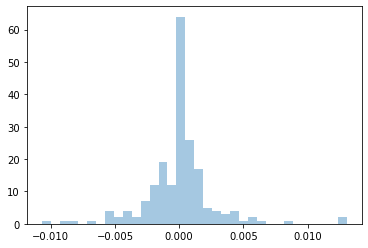

In [151]:
# distribution of residuals
y1 = np.array(y)
y2 = np.array(y_pred_all)
y_diff = y1[:,0] - y2[:,0]
sns.distplot(y_diff, kde=False)

In [154]:
# confidence interval
ols = sm.OLS(y_train, X_train)
res = ols.fit()
print(res.conf_int(0.01))

                      0             1
Open      -9.762799e-15  1.153916e-14
High      -1.565437e-14  1.476619e-14
Low       -1.293426e-14  1.293426e-14
Adj Close  1.000000e+00  1.000000e+00
